<center><h1> DSM-517 Assignment on Hamiltonian Monte Carlo Sampling by Aadar Pandita (2304107001) MSDSM Batch 3 </h1>
</center>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

<h1> <center> Question 1 - Define Likelihood Function </center> </h1>

a) Write down the likelihood for these three parameters. The covariance matrix, in this case, can be considered as a diagonal matrix with values of its diagonal elements represented by the error sigma in the values of y, given as the third column of the attached data file.

In [3]:
# Load data
dataset = np.genfromtxt('/content/data_HMC.txt')
x_values = dataset[:, 0]
y_values = dataset[:, 1]
error_values = dataset[:, 2]


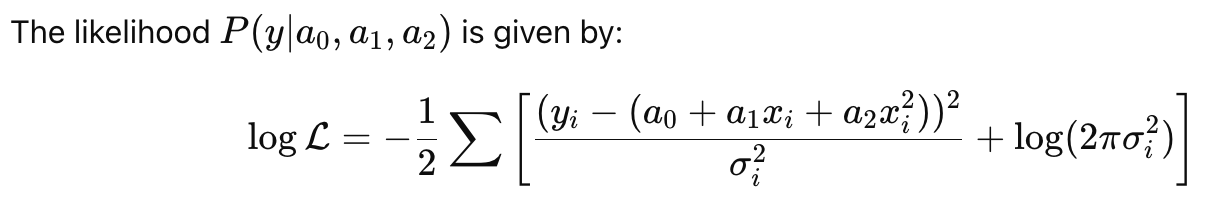

    """
    Compute the log-likelihood of the data given the parameters.
    
    Parameters:
        param_0, param_1, param_2: Model parameters
        x_vals: Independent variable
        y_vals: Observed dependent variable
        err_vals: Errors (standard deviations)
    
    Returns:
        log_likelihood_val: Log-likelihood value
    """

In [4]:
# Defining the log-likelihood function
def calculate_log_likelihood(param_0, param_1, param_2, x_vals, y_vals, err_vals):

    predicted_model = param_0 + param_1 * x_vals + param_2 * x_vals**2
    residuals = y_vals - predicted_model
    log_likelihood_val = -0.5 * np.sum(np.log(2 * np.pi * err_vals**2) + (residuals**2) / err_vals**2)
    return log_likelihood_val


In [5]:
param_0, param_1, param_2 = 1.0, 1.0, 1.0  # Example parameters
log_likelihood_result = calculate_log_likelihood(param_0, param_1, param_2, x_values, y_values, error_values)
print(f"Log-Likelihood: {log_likelihood_result}")

Log-Likelihood: -390.9687364905674


<h1> <center> Question 2 - Priors </center> </h1>

b) Assume uniform priors on the parameters (so you estimate the likelihood only). Further, you can consider the additional prior information that the range within which a_0, a_1 and a_2 varies are the following: (500 - 2000), (0 - 10) and (0 - 5), respectively. This will help you decide the proposal distribution's width and limit the search volume in the parameter space.

    """
    Check if the parameters are within their respective prior bounds.
    
    Parameters:
        param_0, param_1, param_2: Model parameters
    
    Returns:
        True if all parameters are within bounds, otherwise False.
    """

In [6]:
def check_prior_bounds(param_0, param_1, param_2):

    if 500 <= param_0 <= 2000 and 0 <= param_1 <= 10 and 0 <= param_2 <= 5:
        return True
    return False

    """
    Compute the log-likelihood of the data given the parameters,
    incorporating uniform prior constraints.
    
    Parameters:
        param_0, param_1, param_2: Model parameters
        x_vals: Independent variable
        y_vals: Observed dependent variable
        err_vals: Errors (standard deviations)
    
    Returns:
        log_likelihood_val: Log-likelihood value or -infinity if out of bounds
    """

In [7]:
def log_likelihood_with_constraints(param_0, param_1, param_2, x_vals, y_vals, err_vals):

    # Check if parameters are within prior bounds
    if not check_prior_bounds(param_0, param_1, param_2):
        return -np.inf  # Assign -infinity to log-likelihood if out of bounds

    # Compute the log-likelihood
    predicted_model = param_0 + param_1 * x_vals + param_2 * x_vals**2
    residuals = y_vals - predicted_model
    log_likelihood_val = -0.5 * np.sum(np.log(2 * np.pi * err_vals**2) + (residuals**2) / err_vals**2)
    return log_likelihood_val

In [8]:
# Example usage:
param_0, param_1, param_2 = 1000, 5, 2  # Example parameters within bounds
ll_within_bounds = log_likelihood_with_constraints(param_0, param_1, param_2, x_values, y_values, error_values)
print(f"Log-Likelihood with priors: {ll_within_bounds}")

# Parameters outside the bounds
param_0_out, param_1_out, param_2_out = 2500, 12, 6  # Example parameters outside bounds
ll_out_of_bounds = log_likelihood_with_constraints(param_0_out, param_1_out, param_2_out, x_values, y_values, error_values)
print(f"Log-Likelihood with out-of-bound priors: {ll_out_of_bounds}")

Log-Likelihood with priors: -683.55406656925
Log-Likelihood with out-of-bound priors: -inf


<h1> <center> Question 3 - Plot the Chain </center> </h1>

c) Explore visually the chain (plot the chain).

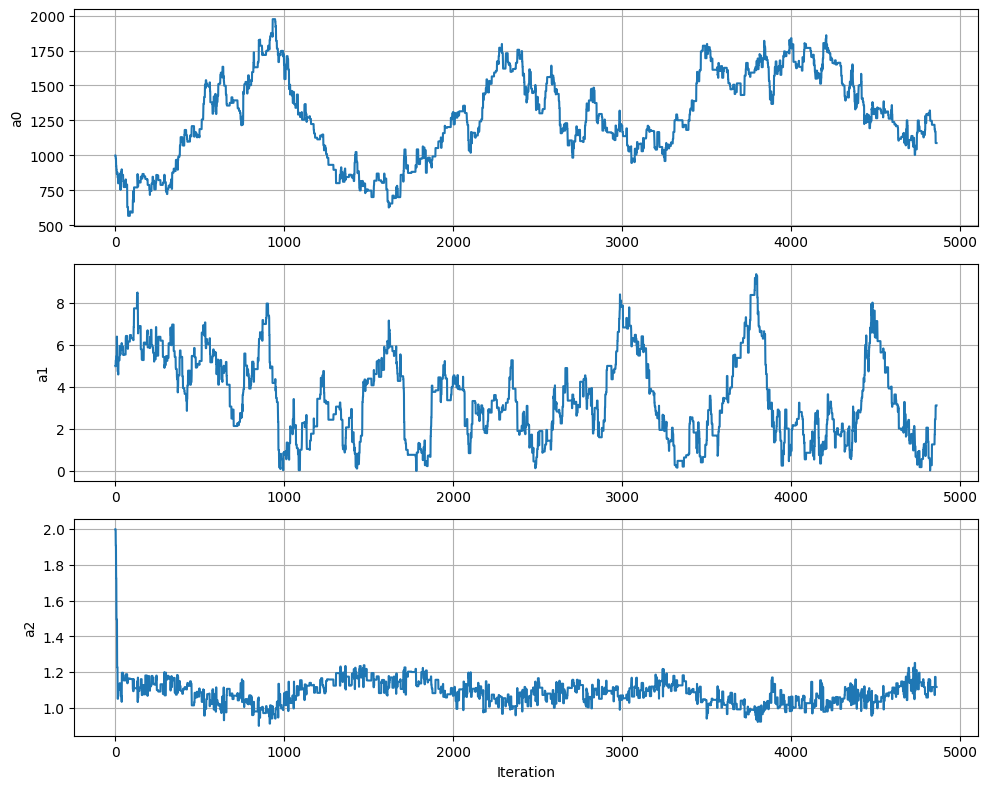

In [9]:
x = dataset[:, 0]
y = dataset[:, 1]
sigma = dataset[:, 2]

# Log-likelihood function
def log_likelihood(params, x, y, sigma):
    a0, a1, a2 = params
    y_model = a0 + a1 * x + a2 * x**2
    residuals = y - y_model
    return -0.5 * np.sum(np.log(2 * np.pi * sigma**2) + (residuals**2) / sigma**2)

# MCMC parameters
n_iterations = 5000
a0_range, a1_range, a2_range = (500, 2000), (0, 10), (0, 5)
chain = []

# Initial parameter guess
current_params = [1000, 5, 2]
current_log_likelihood = log_likelihood(current_params, x, y, sigma)

# Proposal width for parameters
proposal_width = [50, 0.5, 0.2]

# MCMC sampling
for _ in range(n_iterations):
    proposed_params = current_params + np.random.normal(0, proposal_width)
    if not (a0_range[0] <= proposed_params[0] <= a0_range[1] and
            a1_range[0] <= proposed_params[1] <= a1_range[1] and
            a2_range[0] <= proposed_params[2] <= a2_range[1]):
        continue  # Skip proposals outside bounds

    proposed_log_likelihood = log_likelihood(proposed_params, x, y, sigma)
    acceptance_prob = np.exp(proposed_log_likelihood - current_log_likelihood)

    if np.random.rand() < acceptance_prob:
        current_params = proposed_params
        current_log_likelihood = proposed_log_likelihood

    chain.append(current_params)

# Convert chain to numpy array for easier handling
chain = np.array(chain)

# Plot the chain
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
parameter_names = ['a0', 'a1', 'a2']
for i in range(3):
    axs[i].plot(chain[:, i])
    axs[i].set_ylabel(parameter_names[i])
    axs[i].grid(True)
plt.xlabel('Iteration')
plt.tight_layout()
plt.show()

<h1> <center> Question 4 - Compare the Results </center> </h1>

d) To compare the results with the previous analysis, plot the chains for the same number of samples (i.e. 1000, 5000, 10000, 100000) for MH-MCMC sampling and HMC sampling. What do you conclude? For each case show (plot) the marginalized derived pdfs for each parameter (aka the corner plots).

In [10]:
!pip install corner
import corner

MH-MCMC chain for 1000 samples:


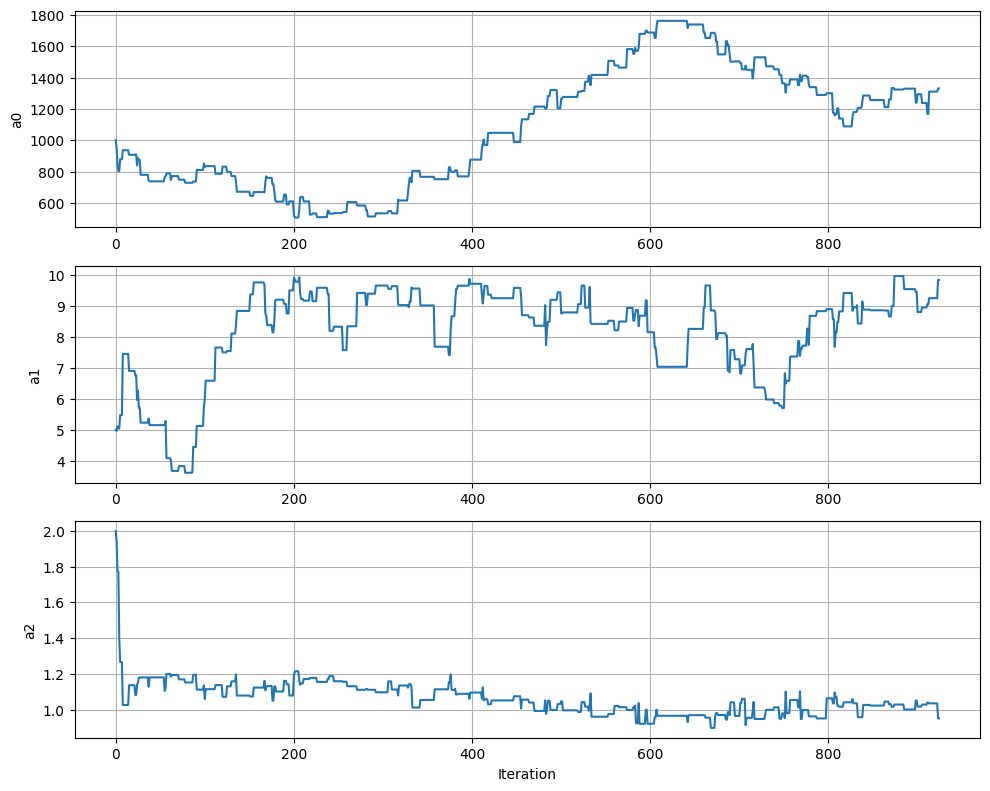

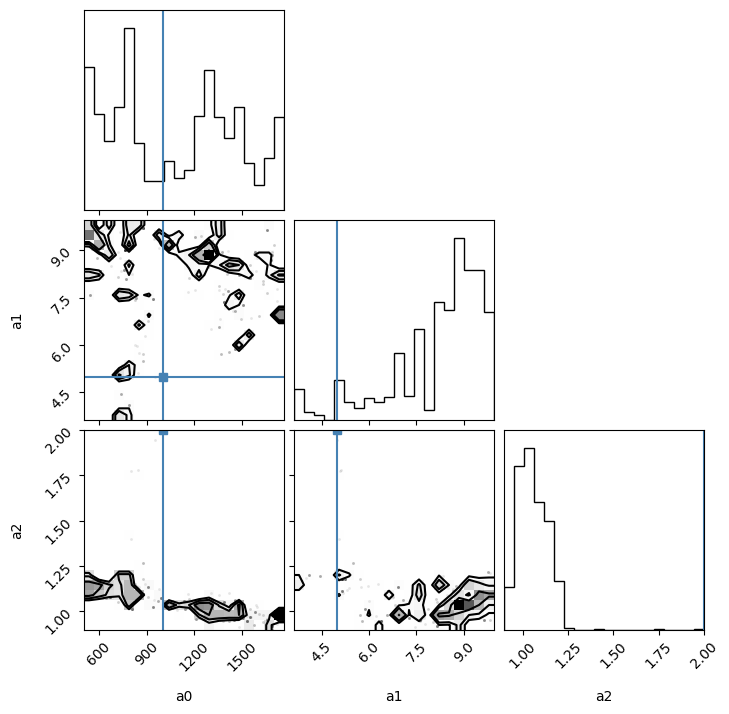

MH-MCMC chain for 5000 samples:


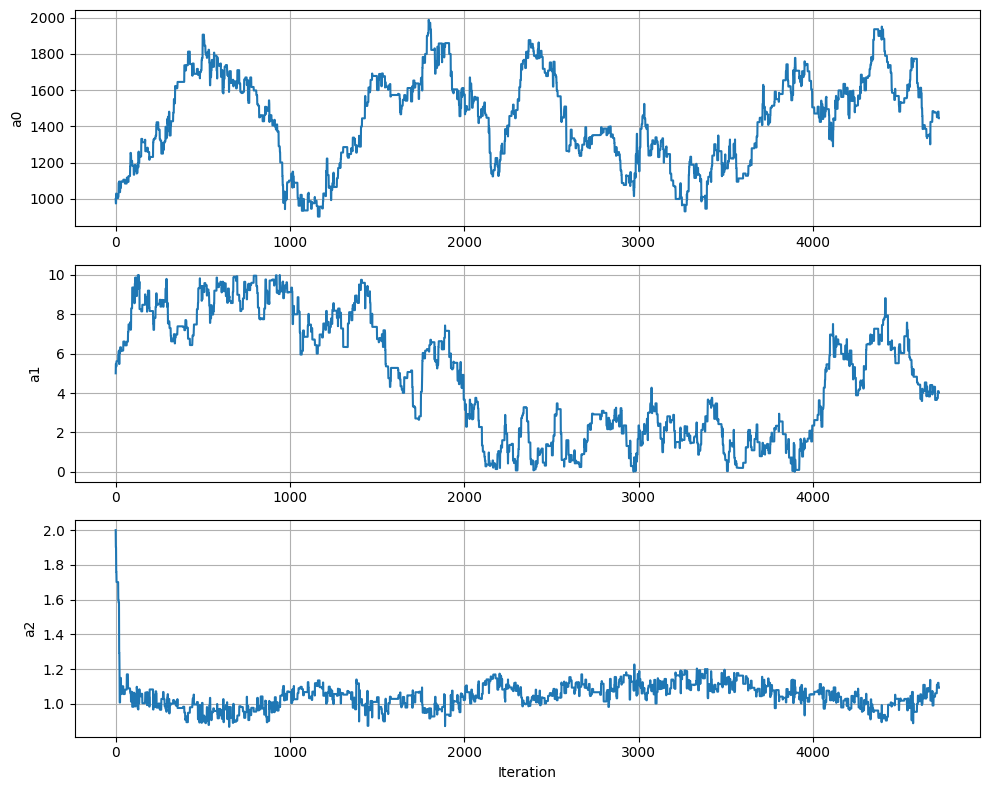

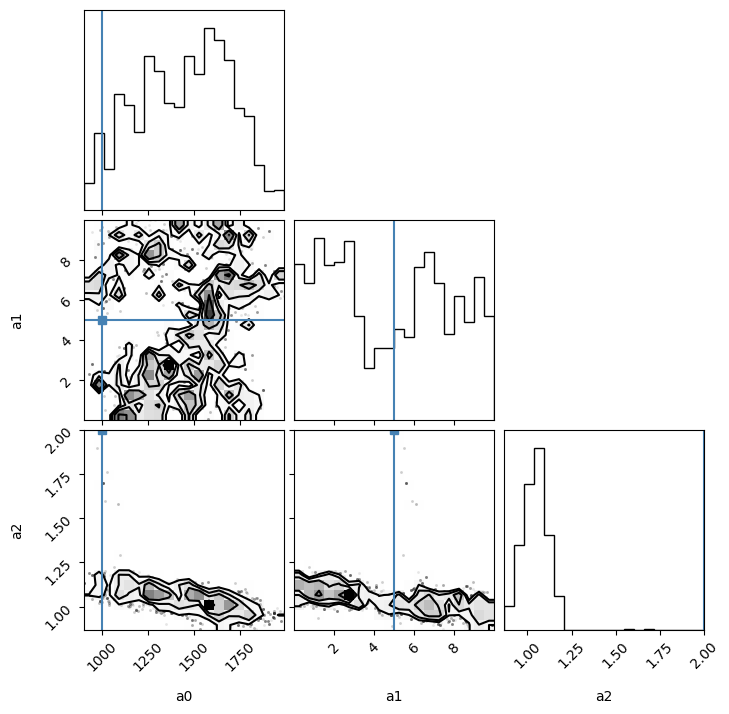

MH-MCMC chain for 10000 samples:


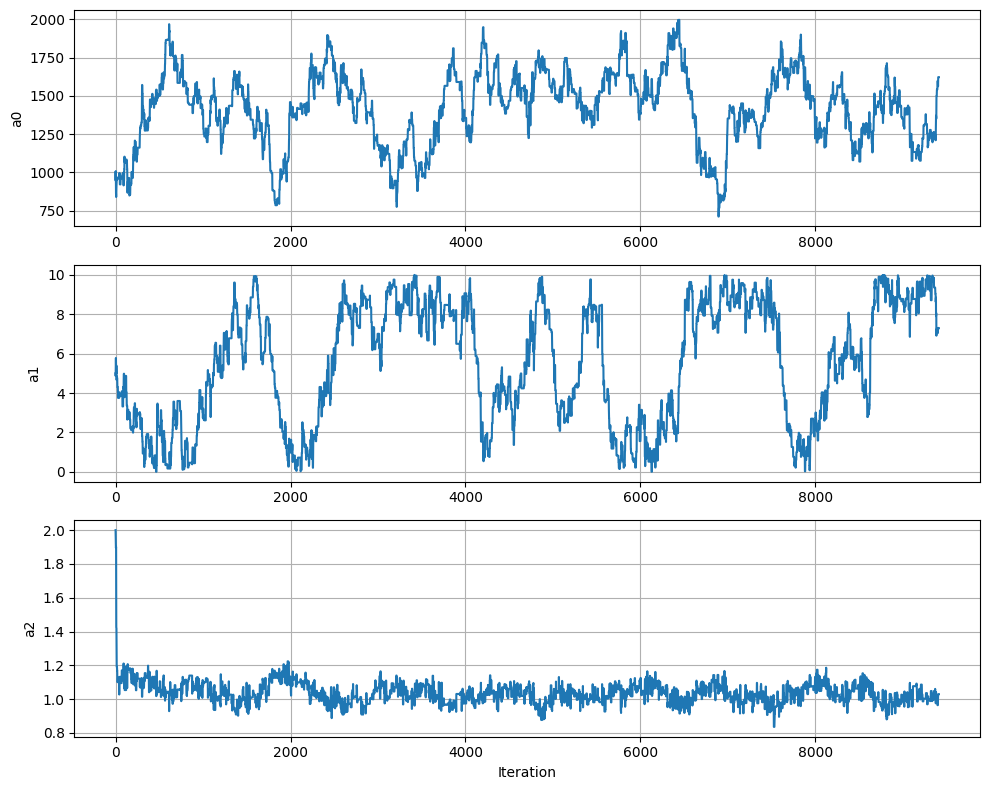

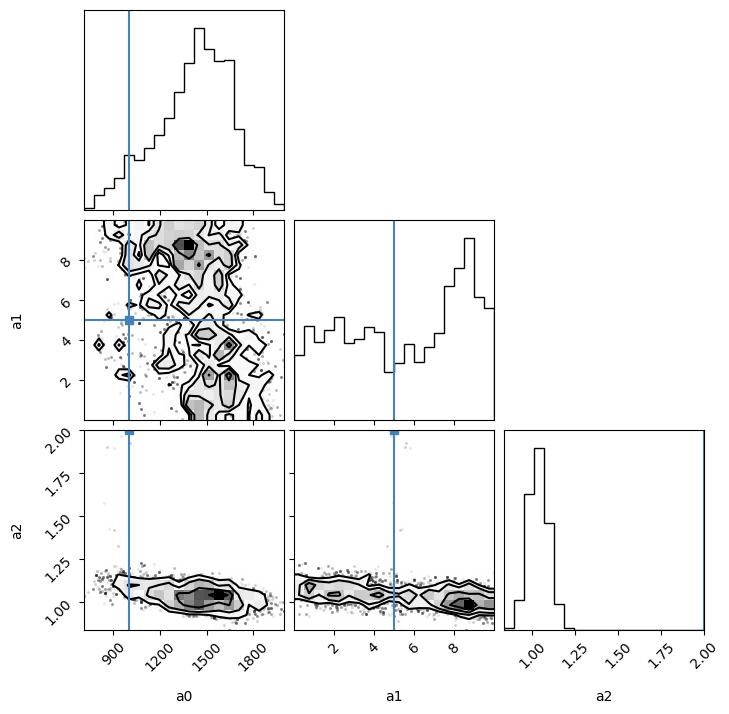

MH-MCMC chain for 100000 samples:


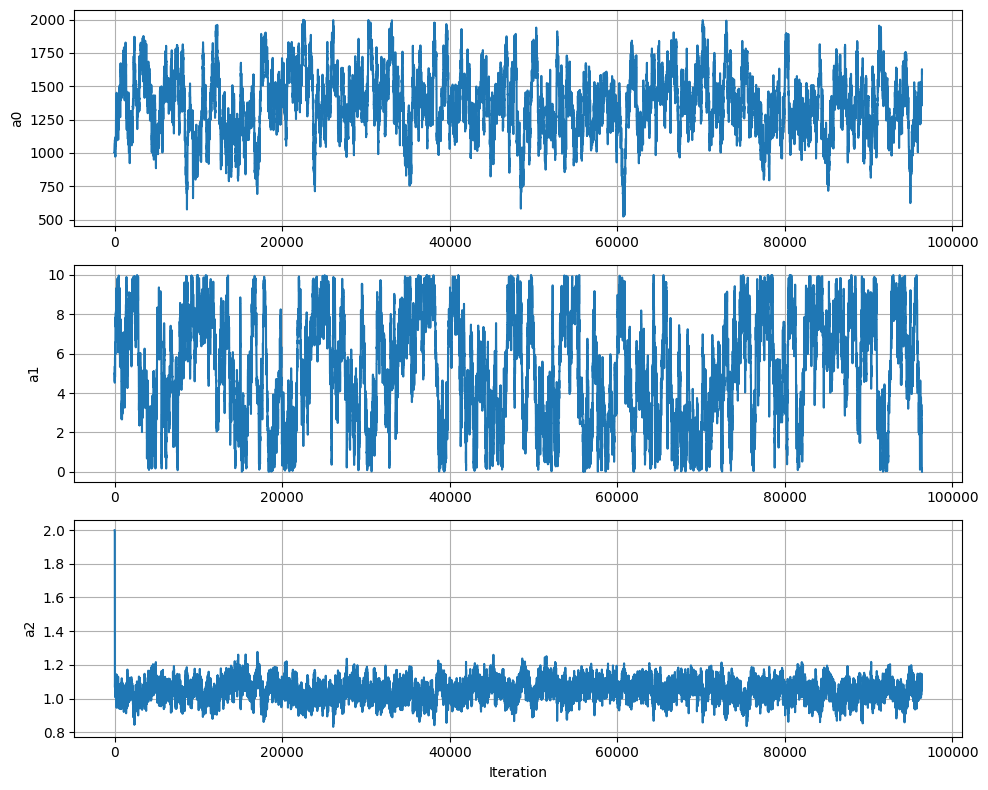

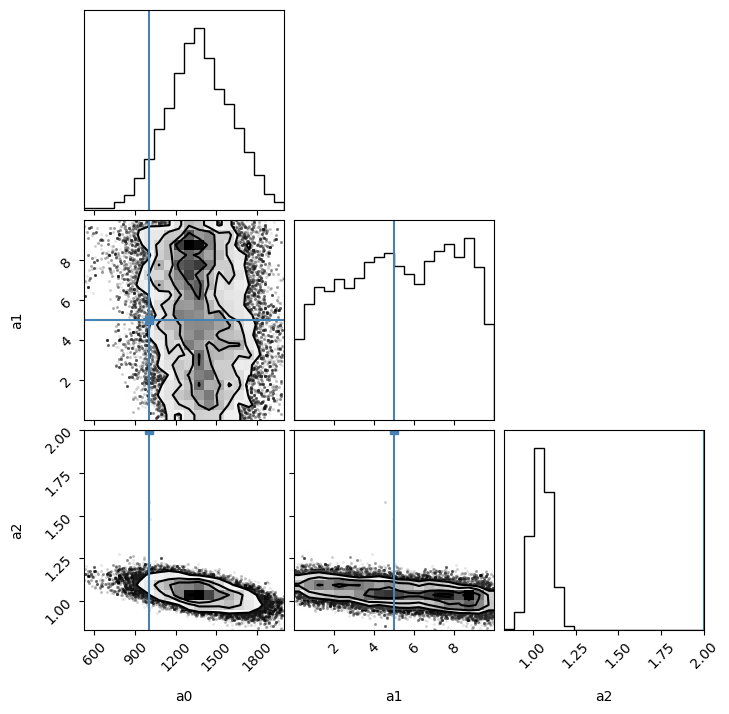

HMC chain for 1000 samples:


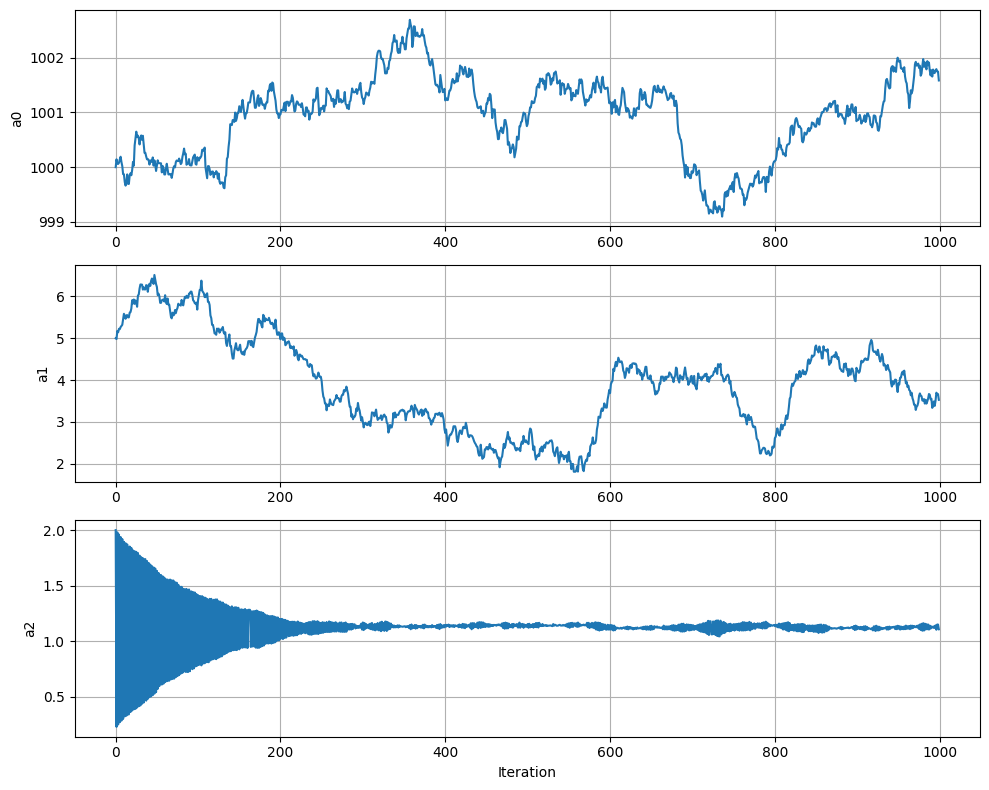

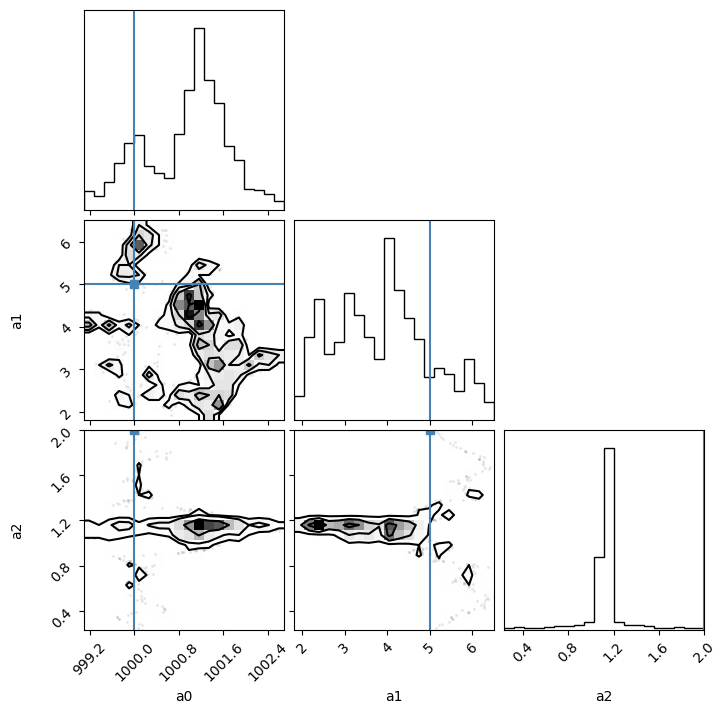

HMC chain for 5000 samples:


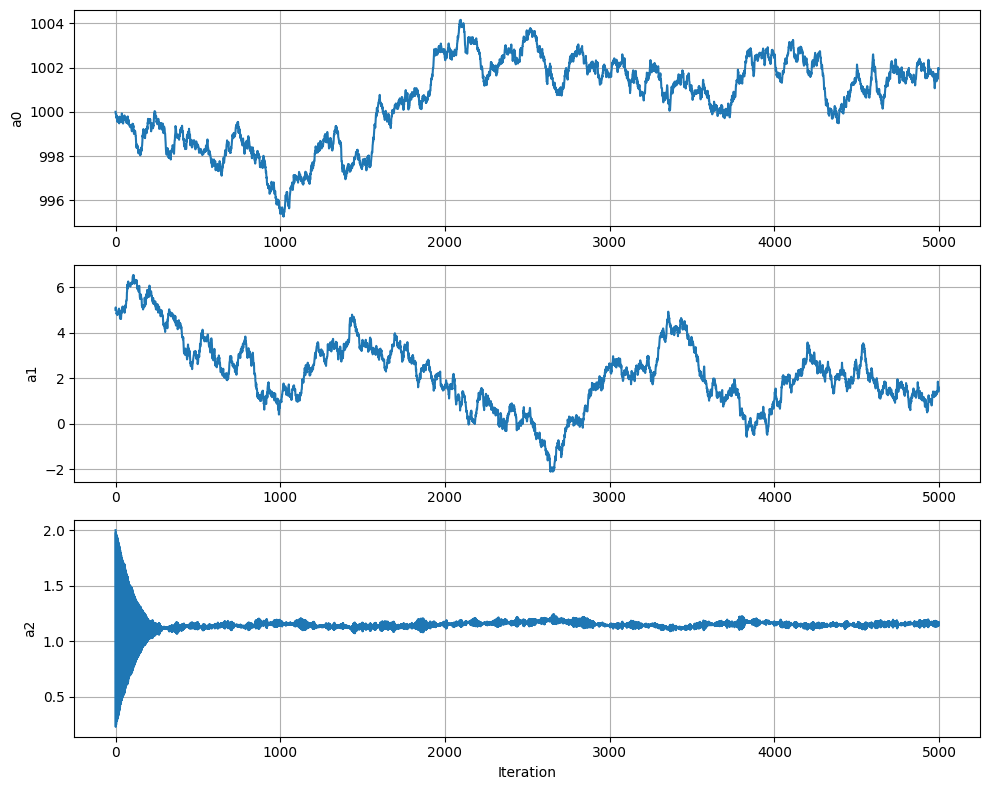

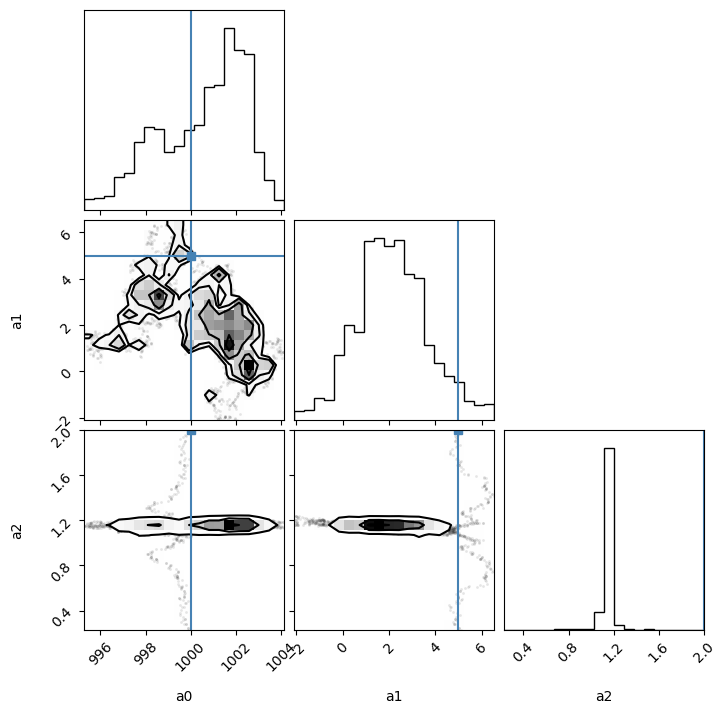

HMC chain for 10000 samples:


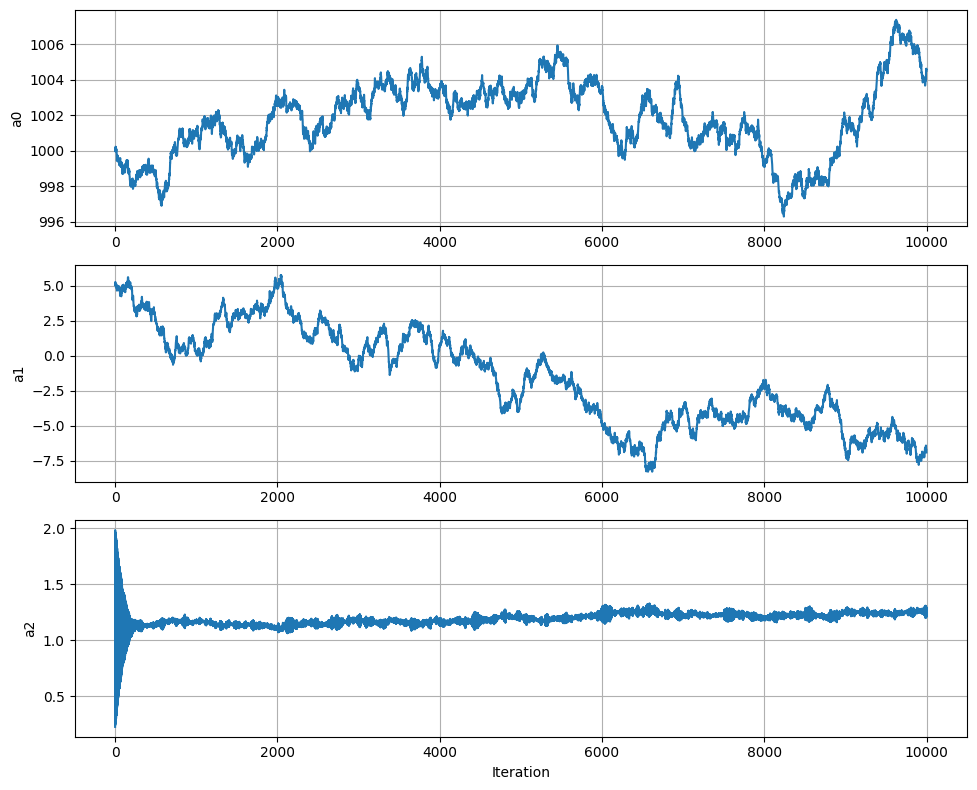

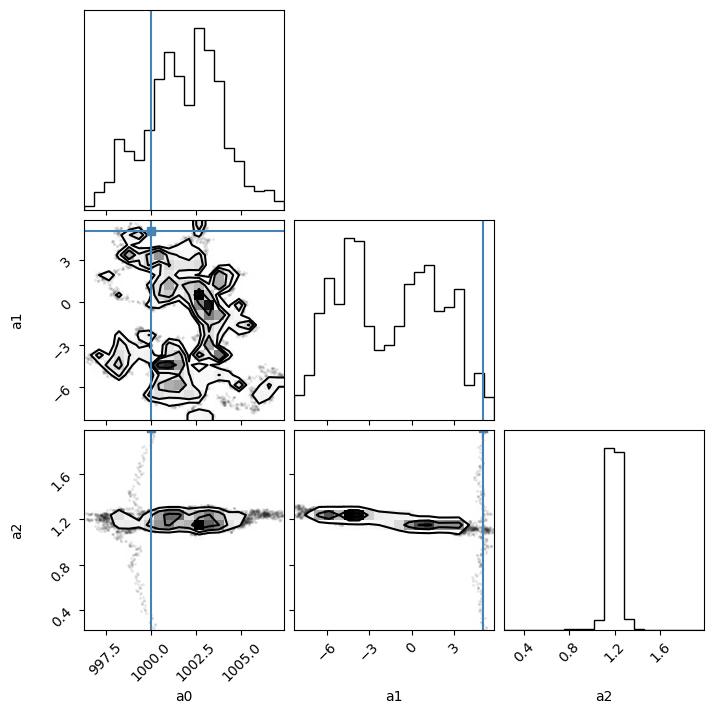

HMC chain for 100000 samples:


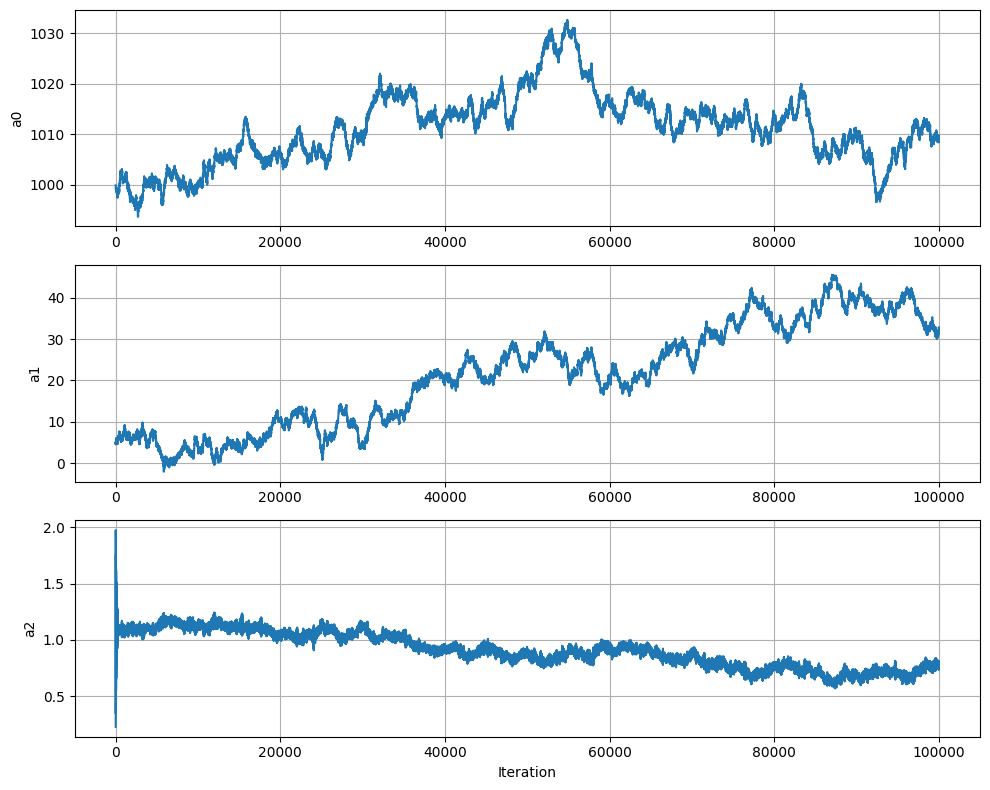

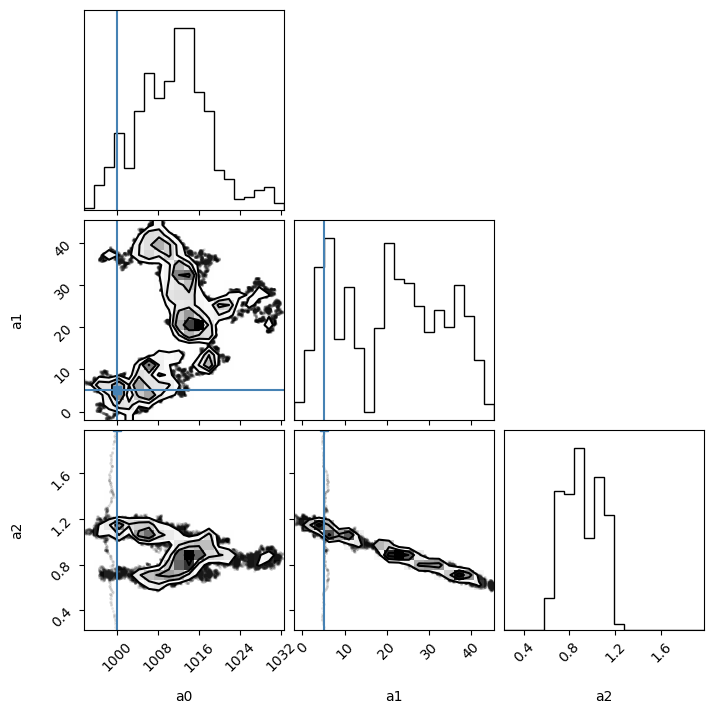

In [11]:
x, y, sigma = dataset[:, 0], dataset[:, 1], dataset[:, 2]

def log_likelihood(params, x, y, sigma):
    a0, a1, a2 = params
    y_model = a0 + a1 * x + a2 * x**2
    residuals = y - y_model
    return -0.5 * np.sum(np.log(2 * np.pi * sigma**2) + (residuals**2) / sigma**2)

def gradient_log_likelihood(params, x, y, sigma):
    a0, a1, a2 = params
    y_model = a0 + a1 * x + a2 * x**2
    residuals = y - y_model
    grad_a0 = np.sum(residuals / sigma**2)
    grad_a1 = np.sum(x * residuals / sigma**2)
    grad_a2 = np.sum(x**2 * residuals / sigma**2)
    return np.array([-grad_a0, -grad_a1, -grad_a2])

# MH-MCMC sampling
def metropolis_hastings(samples, proposal_width):
    chain = []
    current_params = np.array([1000.0, 5.0, 2.0])  # Ensure float type
    current_log_likelihood = log_likelihood(current_params, x, y, sigma)
    for _ in range(samples):
        proposed_params = current_params + np.random.normal(0, proposal_width)
        if not (500 <= proposed_params[0] <= 2000 and 0 <= proposed_params[1] <= 10 and 0 <= proposed_params[2] <= 5):
            continue
        proposed_log_likelihood = log_likelihood(proposed_params, x, y, sigma)
        acceptance_prob = np.exp(proposed_log_likelihood - current_log_likelihood)
        if np.random.rand() < acceptance_prob:
            current_params = proposed_params
            current_log_likelihood = proposed_log_likelihood
        chain.append(current_params)
    return np.array(chain)

# HMC sampling
def hmc_sampling(samples, step_size=0.005, n_steps=20):
    chain = []
    current_params = np.array([1000.0, 5.0, 2.0])  # Initialize as float
    for _ in range(samples):
        q = current_params.copy()
        p = np.random.normal(size=q.shape)  # Random momentum
        current_p = p.copy()
        log_likelihood_q = log_likelihood(q, x, y, sigma)

        # Leapfrog integration
        p -= step_size * gradient_log_likelihood(q, x, y, sigma) / 2
        for _ in range(n_steps):
            q += step_size * p
            p -= step_size * gradient_log_likelihood(q, x, y, sigma)
        p -= step_size * gradient_log_likelihood(q, x, y, sigma) / 2

        # Hamiltonian
        proposed_log_likelihood = log_likelihood(q, x, y, sigma)
        current_H = -log_likelihood_q + 0.5 * np.sum(current_p**2)
        proposed_H = -proposed_log_likelihood + 0.5 * np.sum(p**2)
        if np.random.rand() < np.exp(current_H - proposed_H):
            current_params = q
        chain.append(current_params)
    return np.array(chain)

# Sample sizes and proposal width
sample_sizes = [1000, 5000, 10000, 100000]
proposal_width = [50, 0.5, 0.2]

# MH-MCMC sampling and visualization
for samples in sample_sizes:
    mh_chain = metropolis_hastings(samples, proposal_width)
    print(f"MH-MCMC chain for {samples} samples:")
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    for i, param in enumerate(['a0', 'a1', 'a2']):
        axs[i].plot(mh_chain[:, i])
        axs[i].set_ylabel(param)
        axs[i].grid(True)
    plt.xlabel('Iteration')
    plt.tight_layout()
    plt.show()

    corner.corner(mh_chain, labels=["a0", "a1", "a2"], truths=[1000, 5, 2])
    plt.show()

# HMC sampling and visualization
for samples in sample_sizes:
    hmc_chain = hmc_sampling(samples, step_size=0.005, n_steps=20)
    print(f"HMC chain for {samples} samples:")
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    for i, param in enumerate(['a0', 'a1', 'a2']):
        axs[i].plot(hmc_chain[:, i])
        axs[i].set_ylabel(param)
        axs[i].grid(True)
    plt.xlabel('Iteration')
    plt.tight_layout()
    plt.show()

    corner.corner(hmc_chain, labels=["a0", "a1", "a2"], truths=[1000, 5, 2])
    plt.show()

<h1> <center> Question 5 - Gelman-Rubin Convergence Test </center> </h1>

e) Now start 5 independent chains at 5 random points in the parameter space. Write and apply a Gelman-Rubin convergence test, and deduce roughly how long the chains should be for convergence for HMC and MH-MCMC sampling.


In [12]:
x_values = tf.constant(dataset[:, 0], dtype=tf.float32)
y_values = tf.constant(dataset[:, 1], dtype=tf.float32)
error_values = tf.constant(dataset[:, 2], dtype=tf.float32)

# Parameter bounds
PARAM_0_MIN, PARAM_0_MAX = 500.0, 2000.0
PARAM_1_MIN, PARAM_1_MAX = 0.0, 10.0
PARAM_2_MIN, PARAM_2_MAX = 0.0, 5.0
proposal_scale = [100.0, 1.0, 0.5]

# Define the target log-probability function
def calculate_target_log_prob(param_0, param_1, param_2):
    within_bounds = tf.logical_and(
        tf.logical_and(PARAM_0_MIN <= param_0, param_0 <= PARAM_0_MAX),
        tf.logical_and(
            tf.logical_and(PARAM_1_MIN <= param_1, param_1 <= PARAM_1_MAX),
            tf.logical_and(PARAM_2_MIN <= param_2, param_2 <= PARAM_2_MAX)
        )
    )
    def out_of_bounds():
        return tf.constant(-np.inf, dtype=tf.float32)

    def in_bounds():
        predicted_model = param_0 + param_1 * x_values + param_2 * x_values**2
        residuals = y_values - predicted_model
        log_likelihood = -0.5 * tf.reduce_sum(
            tf.math.log(2 * np.pi * error_values**2) +
            (residuals**2) / error_values**2
        )
        return log_likelihood

    return tf.cond(within_bounds, in_bounds, out_of_bounds)

# MH-MCMC Sampling
def run_mh_mcmc(target_log_prob_fn, initial_state, proposal_scale, num_samples):
    samples = [tf.convert_to_tensor(initial_state, dtype=tf.float32)]
    current_state = tf.convert_to_tensor(initial_state, dtype=tf.float32)
    current_log_prob = target_log_prob_fn(*current_state)

    for _ in range(num_samples - 1):
        proposed_state = tf.stack([
            tf.random.normal([1], mean=current_state[i], stddev=proposal_scale[i])
            for i in range(len(current_state))
        ])
        proposed_state = tf.squeeze(proposed_state)
        proposed_log_prob = target_log_prob_fn(*proposed_state)
        log_acceptance_ratio = proposed_log_prob - current_log_prob
        if tf.math.log(tf.random.uniform([])) < log_acceptance_ratio:
            current_state = proposed_state
            current_log_prob = proposed_log_prob
        samples.append(current_state)
    return tf.stack(samples)

# HMC Sampling
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=lambda param_0, param_1, param_2: calculate_target_log_prob(param_0, param_1, param_2),
    step_size=0.1,
    num_leapfrog_steps=10
)

@tf.function
def run_hmc_chain(initial_state, num_samples, num_burnin_steps=200):
    return tfp.mcmc.sample_chain(
        num_results=num_samples,
        current_state=initial_state,
        kernel=hmc_kernel,
        num_burnin_steps=num_burnin_steps,
        trace_fn=None
    )

    """
    Compute the Gelman-Rubin convergence statistic (R-hat) for multiple chains.
    Parameters:
        chains: A 3D array of shape (num_chains, num_samples, num_params).
    Returns:
        r_hat: A 1D array of R-hat values for each parameter.
    """

In [13]:
# Gelman-Rubin Diagnostic
def compute_r_hat(chains):

    num_chains, num_samples, num_params = chains.shape

    chain_means = np.mean(chains, axis=1)
    chain_variances = np.var(chains, axis=1, ddof=1)
    between_variance = num_samples * np.var(chain_means, axis=0, ddof=1)
    within_variance = np.mean(chain_variances, axis=0)
    marginal_variance = (1 - 1 / num_samples) * within_variance + (1 / num_samples) * between_variance
    r_hat = np.sqrt(marginal_variance / within_variance)
    return r_hat

In [14]:
# Initialize 5 random chains
num_chains = 5
num_samples_per_chain = 1000
parameter_bounds = [(PARAM_0_MIN, PARAM_0_MAX), (PARAM_1_MIN, PARAM_1_MAX), (PARAM_2_MIN, PARAM_2_MAX)]
np.random.seed(42)
initial_states = [
    [np.random.uniform(low, high) for (low, high) in parameter_bounds]
    for _ in range(num_chains)
]

# Run MH-MCMC and HMC chains
mh_chains = []
hmc_chains = []

for initial_point in initial_states:
    # MH-MCMC
    mh_chain = run_mh_mcmc(calculate_target_log_prob, initial_point, proposal_scale, num_samples_per_chain)
    mh_chains.append(mh_chain.numpy())

    # HMC
    hmc_chain = run_hmc_chain(initial_point, num_samples=num_samples_per_chain)
    hmc_chains.append([hmc_chain[i].numpy() for i in range(3)])

# Convert to 3D NumPy arrays
mh_chains = np.array(mh_chains)  # Shape: (5, 1000, 3)
hmc_chains = np.transpose(np.array(hmc_chains), (1, 0, 2))  # Shape: (5, 1000, 3)

# Compute R-hat values for MH-MCMC and HMC
mh_r_hat = compute_r_hat(mh_chains)
hmc_r_hat = compute_r_hat(hmc_chains)
print(f"MH-MCMC R-hat values: {mh_r_hat}")
print(f"HMC R-hat values: {hmc_r_hat}")

# Determine convergence threshold
chain_lengths = [500, 1000, 2000, 5000]
mh_r_hat_per_length = []
hmc_r_hat_per_length = []

for length in chain_lengths:
    mh_trimmed = mh_chains[:, :length, :]
    hmc_trimmed = hmc_chains[:, :length, :]
    mh_r_hat_per_length.append(compute_r_hat(mh_trimmed))
    hmc_r_hat_per_length.append(compute_r_hat(hmc_trimmed))

MH-MCMC R-hat values: [1.0410917 1.2220293 1.0064342]
HMC R-hat values: [2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183 2.9071183
 2.90

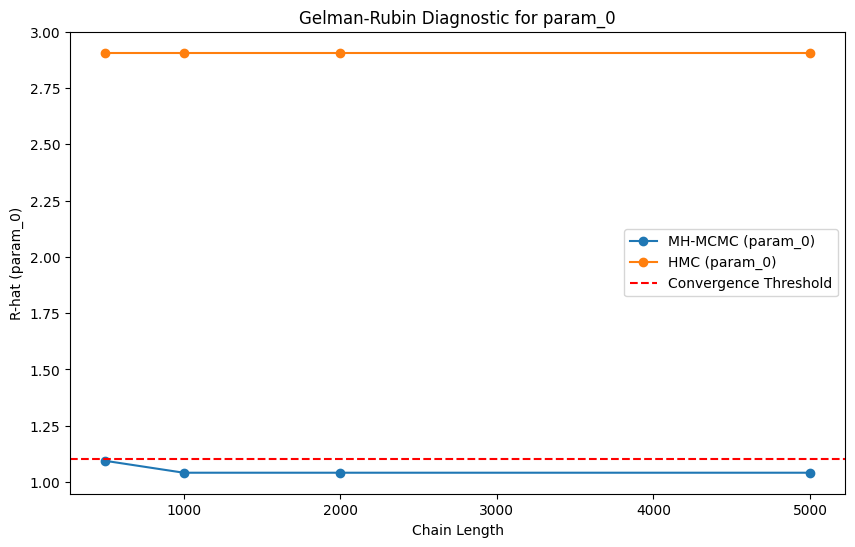

In [15]:
# Plot R-hat values
plt.figure(figsize=(10, 6))
plt.plot(chain_lengths, [r[0] for r in mh_r_hat_per_length], label='MH-MCMC (param_0)', marker='o')
plt.plot(chain_lengths, [r[0] for r in hmc_r_hat_per_length], label='HMC (param_0)', marker='o')
plt.axhline(1.1, color='red', linestyle='--', label='Convergence Threshold')
plt.xlabel('Chain Length')
plt.ylabel('R-hat (param_0)')
plt.legend()
plt.title('Gelman-Rubin Diagnostic for param_0')
plt.show()